<a href="https://colab.research.google.com/github/aravindh1209/delivering-personalized-movie-recommendations-with-an-ai-driven-matchmaking-system/blob/main/pHASE_3_movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Top Recommendations for 'Avatar':
1. Jurassic World
2. Titanic
3. The Hobbit: The Battle of the Five Armies
4. The Dark Knight Rises
5. The Hobbit: The Desolation of Smaug
6. 15 Minutes
7. Live Free or Die Hard
8. Dawn of the Planet of the Apes
9. The Adventures of Tintin
10. A.I. Artificial Intelligence

Simulating evaluation for: Avatar

Confusion Matrix:
 [[90  0]
 [10  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       0.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


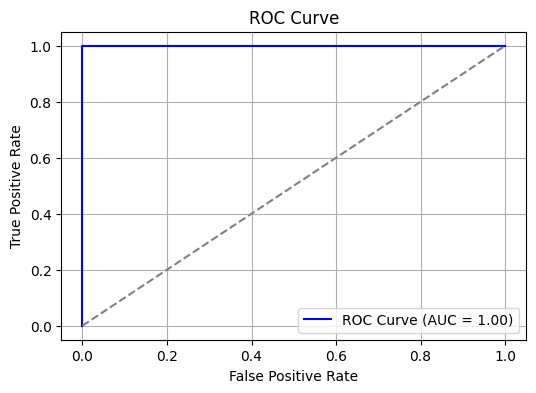

RMSE: 0.2908


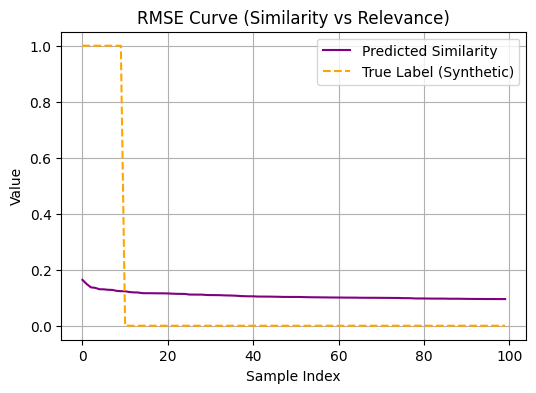

In [5]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("tmdb_5000_credits.csv")

# Extract names from JSON-like strings
def extract_names(data):
    try:
        return [item['name'] for item in ast.literal_eval(data)]
    except:
        return []

# Preprocess cast and crew
df['cast_names'] = df['cast'].apply(extract_names)
df['crew_names'] = df['crew'].apply(extract_names)

# Combine features for each movie
df['features'] = df['cast_names'].apply(lambda x: ' '.join(x)) + ' ' + df['crew_names'].apply(lambda x: ' '.join(x))

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['features'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Title to index mapping
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

# Recommendation function
def get_recommendations(title, top_n=10):
    if title not in indices:
        return f"Movie '{title}' not found in the dataset."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices].tolist()

# Recommendations with similarity scores
def get_scored_recommendations(title, top_n=100):
    if title not in indices:
        return []
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    return [(df['title'].iloc[i[0]], i[1]) for i in sim_scores]

# Simulated Evaluation Function
def simulate_evaluation(title):
    print(f"\nSimulating evaluation for: {title}")

    scored_recs = get_scored_recommendations(title, top_n=100)
    if not scored_recs:
        print("Movie not found.")
        return

    # Synthetic ground truth: top 10 are relevant (1), others are not (0)
    y_true = [1]*10 + [0]*90
    y_scores = [score for _, score in scored_recs]

    # Binary prediction using a threshold
    threshold = 0.3
    y_pred = [1 if score >= threshold else 0 for score in y_scores]

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:\n", cm)

    # Classification Report (includes accuracy, F1, precision, recall)
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # RMSE
    rmse = sqrt(mean_squared_error(y_true, y_scores))
    print(f"RMSE: {rmse:.4f}")

    # RMSE Curve
    plt.figure(figsize=(6, 4))
    plt.plot(range(len(y_scores)), y_scores, label="Predicted Similarity", color='purple')
    plt.plot(range(len(y_true)), y_true, label="True Label (Synthetic)", linestyle='--', color='orange')
    plt.title("RMSE Curve (Similarity vs Relevance)")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

# -----------------------------
# RUN EVERYTHING
# -----------------------------
movie_title = "Avatar"  # Change this to any movie in your dataset
print(f"Top Recommendations for '{movie_title}':")
recommendations = get_recommendations(movie_title)
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

# Run simulated evaluation
simulate_evaluation(movie_title)
